In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os, time, copy
import torch
import torchvision as tv
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import TensorDataset
from torchvision.models import resnet50
import torch.optim as optim
import torch.nn as nn
from cifar_utils import get_model, get_data, show_img

The easiest way to access a GPU for model training is to request one using srun or sbatch and run `python cifar_utils.py` (make sure to update the config in that file as appropriate)

In [2]:
# Model parameters
config = {
        'num_classes' : 100,
        'batch_size' : 128,
        'lr' : 0.0001,
        'feature_extract' : False, # If False, fine tune all layers. If True, fine tune last layer only
        'num_epochs' : 30,
        'device' : 'cpu',
        'frac_val' : 0.5, # CHANGED FROM 0.3
        'model_filename' : 'best-cifar100-model-fracval=0.7', # CHANGED FROM no suffix
        'num_workers' : 4,
}

In [3]:
model = get_model(config)

Params to learn:
	 conv1.weight
	 bn1.weight
	 bn1.bias
	 layer1.0.conv1.weight
	 layer1.0.bn1.weight
	 layer1.0.bn1.bias
	 layer1.0.conv2.weight
	 layer1.0.bn2.weight
	 layer1.0.bn2.bias
	 layer1.0.conv3.weight
	 layer1.0.bn3.weight
	 layer1.0.bn3.bias
	 layer1.0.downsample.0.weight
	 layer1.0.downsample.1.weight
	 layer1.0.downsample.1.bias
	 layer1.1.conv1.weight
	 layer1.1.bn1.weight
	 layer1.1.bn1.bias
	 layer1.1.conv2.weight
	 layer1.1.bn2.weight
	 layer1.1.bn2.bias
	 layer1.1.conv3.weight
	 layer1.1.bn3.weight
	 layer1.1.bn3.bias
	 layer1.2.conv1.weight
	 layer1.2.bn1.weight
	 layer1.2.bn1.bias
	 layer1.2.conv2.weight
	 layer1.2.bn2.weight
	 layer1.2.bn2.bias
	 layer1.2.conv3.weight
	 layer1.2.bn3.weight
	 layer1.2.bn3.bias
	 layer2.0.conv1.weight
	 layer2.0.bn1.weight
	 layer2.0.bn1.bias
	 layer2.0.conv2.weight
	 layer2.0.bn2.weight
	 layer2.0.bn2.bias
	 layer2.0.conv3.weight
	 layer2.0.bn3.weight
	 layer2.0.bn3.bias
	 layer2.0.downsample.0.weight
	 layer2.0.downsample.1.weight

In [4]:
'''
=== With frac_val = 0.7 === 
Epoch 29/29
----------
train Loss: 0.0295 Acc: 0.9938
val Loss: 2.5458 Acc: 0.5470

Training complete in 4m 43s
Best val Acc: 0.546976
'''

'''
=== With frac_val = 0.5 ===  <-- THIS IS WHAT WE USE
Epoch 29/29
----------
train Loss: 0.0315 Acc: 0.9913
val Loss: 2.3326 Acc: 0.5974

Training complete in 6m 44s
Best val Acc: 0.597367
'''


'''
=== With frac_val = 0.3 === 
Epoch 0/0
----------
train Loss: 3.3722 Acc: 0.2335
val Loss: 2.2128 Acc: 0.4491

Training complete in 3m 27s
Best val Acc: 0.449056


Epoch 29/29
----------
train Loss: 0.0373 Acc: 0.9889
val Loss: 2.4569 Acc: 0.6305

Training complete in 64m 27s
Best val Acc: 0.630556
'''
None

In [5]:
val_imgs = np.load('./.cache/' + config['model_filename'] + f'-valdata_frac={config["frac_val"]}.npy')
val_labels = np.load('./.cache/' + config['model_filename'] + f'-vallabels_frac={config["frac_val"]}.npy')

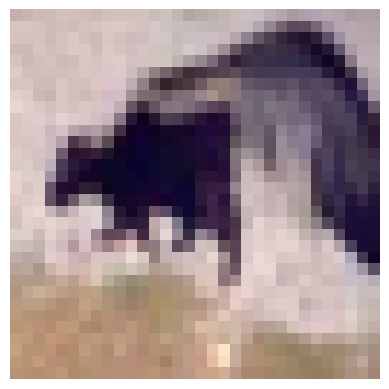

In [6]:
show_img(val_imgs[np.random.choice(val_imgs.shape[0])])

In [7]:
%%time

# Get softmax scores
with torch.no_grad():
    logits = model(torch.from_numpy(val_imgs))
    
softmax_scores = torch.nn.functional.softmax(logits,dim=1)
softmax_scores = softmax_scores.numpy()

CPU times: user 5min 39s, sys: 9min 22s, total: 15min 1s
Wall time: 26.7 s


In [8]:
# Save softmax scores
pth = './.cache/' + config['model_filename'] + f'-valsoftmax_frac={config["frac_val"]}.npy'

np.save(pth, softmax_scores)
print(f'Save softmax scores to {pth}')

Save softmax scores to ./.cache/best-cifar100-model-fracval=0.7-valsoftmax_frac=0.5.npy
